In [260]:
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [261]:
#extract the dataset from the excel sheet
excel_file_path = '/Users/senaakpalamut/Desktop/atmoshpericemissionsghg.xlsx'
wb = load_workbook(excel_file_path)
sheet_name = 'GHG total '
ws = wb[sheet_name]
data = []
for row in ws.iter_rows(values_only=True):
    data.append(row)

# Create a DataFrame
df_GHG = pd.DataFrame(data, columns=data[0])
print(df_GHG)


    Total greenhouse gas1 emissions by industry section and group, 1990 to 2021  \
0    Total greenhouse gas1 emissions by industry se...                            
1                                    UK resident basis                            
2                                                 None                            
3                                                 None                            
4                                                    A                            
..                                                 ...                            
166                                               None                            
167  All figures are reported to 1 decimal place. T...                            
168                                               None                            
169  Source: Ricardo Energy and Environment, Office...                            
170                                               None                            

   

In [263]:
# Drop rows after index 166
df_GHG = df_GHG.loc[30:160].copy()

In [264]:
df_GHG

,"Total greenhouse gas1 emissions by industry section and group, 1990 to 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Contents!A7,Contents!A7,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents
30,1,A,"Products of agriculture, hunting and related s...",54988.9,54795.4,54466.2,53619.5,54353.8,54221.5,55572.0,...,48849.5,47799.2,49594.6,50206.6,49600.6,50330.4,49644.8,49244.1,47702.7,49204.5
31,2,A,"Products of forestry, logging and related serv...",40.8,41.5,42.8,48.4,56.3,47.3,45.1,...,56.7,55.1,67.7,80.2,89.2,93.3,93.3,91.8,85.7,99.4
32,3,A,Fish and other fishing products; aquaculture p...,948.7,971.7,1001.5,1057.4,1077.2,1122.9,1089.1,...,765.6,759.1,909.5,859.5,844.6,862.7,819.6,724.3,711.7,736.1
33,5,B,Mining of coal and lignite,25529.4,26151.3,25911.6,23988.2,16098.4,17462.6,16154.3,...,3061.8,2170.1,2158.9,1816.2,848.2,818.6,788.8,759.7,748.6,712.6
34,6,B,Crude petroleum and natural gas,22985.1,22536.1,23478.9,25206.4,26874.6,27369.8,28799.9,...,18297.4,17925.7,17532.1,19275.6,18854.1,18865.9,18856.1,18903.0,17269.5,15173.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,95,S,Repair services of computers and personal and ...,94,94.7,92.3,94.2,97.6,99.0,99.8,...,66.2,65.4,64.9,66.9,69.6,68.3,68.9,69.2,58.2,65.9
157,96,S,Other personal services,574.9,624.6,601.4,625.0,638.1,656.4,681.7,...,641.1,642.7,600.9,628.5,652.4,640.4,626.2,628.1,524.4,594.5
158,97,T,Services of households as employers of domesti...,76.3,75.1,76.8,78.2,81.9,83.4,81.6,...,47.3,41.9,46.4,42.5,51.6,46.2,47.6,47.7,31.5,40.7
159,100,None,Consumer expenditure - not travel,83410.2,92268.3,89608.9,93915.5,89537.7,84970.8,96523.9,...,80386.9,81561.1,68854.3,71848.4,73373.6,71490.1,74206.4,71396.1,71116.9,75897.8


In [265]:
#percentage of missing values for each column
missing_percentage = df_GHG.isnull().mean() * 100

missing_info = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

print(missing_info)

                                               Column  Missing Percentage
0   Total greenhouse gas1 emissions by industry se...            0.000000
1                                                None            1.526718
2                                                None            0.000000
3                                                None            0.000000
4                                                None            0.000000
5                                                None            0.000000
6                                                None            0.000000
7                                                None            0.000000
8                                                None            0.000000
9                                                None            0.000000
10                                               None            0.000000
11                                               None            0.000000
12                                    

In [266]:
#DEFINING PROPER COLUMN NAMES
new_column_names_desc = ['SIC Group', 'Section', 'Type', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
                         '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                         '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                         '2020', '2021']
df_GHG.columns = new_column_names_desc
print(df_GHG)


    SIC Group Section                                               Type  \
30          1       A  Products of agriculture, hunting and related s...   
31          2       A  Products of forestry, logging and related serv...   
32          3       A  Fish and other fishing products; aquaculture p...   
33          5       B                         Mining of coal and lignite   
34          6       B                    Crude petroleum and natural gas   
..        ...     ...                                                ...   
156        95       S  Repair services of computers and personal and ...   
157        96       S                            Other personal services   
158        97       T  Services of households as employers of domesti...   
159       100    None                  Consumer expenditure - not travel   
160       101    None                      Consumer expenditure - travel   

        1990     1991     1992     1993     1994     1995     1996  ...  \
30   54988.9

In [267]:
df_GHG

,SIC Group,Section,Type,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
30,1,A,"Products of agriculture, hunting and related s...",54988.9,54795.4,54466.2,53619.5,54353.8,54221.5,55572.0,...,48849.5,47799.2,49594.6,50206.6,49600.6,50330.4,49644.8,49244.1,47702.7,49204.5
31,2,A,"Products of forestry, logging and related serv...",40.8,41.5,42.8,48.4,56.3,47.3,45.1,...,56.7,55.1,67.7,80.2,89.2,93.3,93.3,91.8,85.7,99.4
32,3,A,Fish and other fishing products; aquaculture p...,948.7,971.7,1001.5,1057.4,1077.2,1122.9,1089.1,...,765.6,759.1,909.5,859.5,844.6,862.7,819.6,724.3,711.7,736.1
33,5,B,Mining of coal and lignite,25529.4,26151.3,25911.6,23988.2,16098.4,17462.6,16154.3,...,3061.8,2170.1,2158.9,1816.2,848.2,818.6,788.8,759.7,748.6,712.6
34,6,B,Crude petroleum and natural gas,22985.1,22536.1,23478.9,25206.4,26874.6,27369.8,28799.9,...,18297.4,17925.7,17532.1,19275.6,18854.1,18865.9,18856.1,18903.0,17269.5,15173.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,95,S,Repair services of computers and personal and ...,94,94.7,92.3,94.2,97.6,99.0,99.8,...,66.2,65.4,64.9,66.9,69.6,68.3,68.9,69.2,58.2,65.9
157,96,S,Other personal services,574.9,624.6,601.4,625.0,638.1,656.4,681.7,...,641.1,642.7,600.9,628.5,652.4,640.4,626.2,628.1,524.4,594.5
158,97,T,Services of households as employers of domesti...,76.3,75.1,76.8,78.2,81.9,83.4,81.6,...,47.3,41.9,46.4,42.5,51.6,46.2,47.6,47.7,31.5,40.7
159,100,None,Consumer expenditure - not travel,83410.2,92268.3,89608.9,93915.5,89537.7,84970.8,96523.9,...,80386.9,81561.1,68854.3,71848.4,73373.6,71490.1,74206.4,71396.1,71116.9,75897.8


In [268]:
df_GHG.dtypes

SIC Group     object
Section       object
Type          object
1990          object
1991         float64
1992         float64
1993         float64
1994         float64
1995         float64
1996         float64
1997         float64
1998         float64
1999         float64
2000         float64
2001         float64
2002         float64
2003         float64
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013          object
2014          object
2015         float64
2016         float64
2017         float64
2018         float64
2019         float64
2020         float64
2021          object
dtype: object

In [269]:
# FIX THE DATATYPES
year_columns = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
                '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
df_GHG[year_columns] = df_GHG[year_columns].astype('float64')
print(df_GHG.dtypes)

SIC Group     object
Section       object
Type          object
1990         float64
1991         float64
1992         float64
1993         float64
1994         float64
1995         float64
1996         float64
1997         float64
1998         float64
1999         float64
2000         float64
2001         float64
2002         float64
2003         float64
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
2019         float64
2020         float64
2021         float64
dtype: object


In [270]:
df_GHG.duplicated()

30     False
31     False
32     False
33     False
34     False
       ...  
156    False
157    False
158    False
159    False
160    False
Length: 131, dtype: bool

In [271]:
# Create a new row with the sum of emissions for each year
sum_row = pd.DataFrame(columns=year_columns)
sum_row.loc[0] = df_GHG[year_columns].sum()
sum_row['SIC Group'] = 'Total'
sum_row['Section'] = 'Total'
sum_row['Type'] = 'Total'

# Concatenate the new row to the original DataFrame
df_GHG = pd.concat([df_GHG, sum_row], ignore_index=True)

In [272]:
df_GHG

,SIC Group,Section,Type,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,A,"Products of agriculture, hunting and related s...",54988.9,54795.4,54466.2,53619.5,54353.8,54221.5,55572.0,...,48849.5,47799.2,49594.6,50206.6,49600.6,50330.4,49644.8,49244.1,47702.7,49204.5
1,2,A,"Products of forestry, logging and related serv...",40.8,41.5,42.8,48.4,56.3,47.3,45.1,...,56.7,55.1,67.7,80.2,89.2,93.3,93.3,91.8,85.7,99.4
2,3,A,Fish and other fishing products; aquaculture p...,948.7,971.7,1001.5,1057.4,1077.2,1122.9,1089.1,...,765.6,759.1,909.5,859.5,844.6,862.7,819.6,724.3,711.7,736.1
3,5,B,Mining of coal and lignite,25529.4,26151.3,25911.6,23988.2,16098.4,17462.6,16154.3,...,3061.8,2170.1,2158.9,1816.2,848.2,818.6,788.8,759.7,748.6,712.6
4,6,B,Crude petroleum and natural gas,22985.1,22536.1,23478.9,25206.4,26874.6,27369.8,28799.9,...,18297.4,17925.7,17532.1,19275.6,18854.1,18865.9,18856.1,18903.0,17269.5,15173.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,96,S,Other personal services,574.9,624.6,601.4,625.0,638.1,656.4,681.7,...,641.1,642.7,600.9,628.5,652.4,640.4,626.2,628.1,524.4,594.5
128,97,T,Services of households as employers of domesti...,76.3,75.1,76.8,78.2,81.9,83.4,81.6,...,47.3,41.9,46.4,42.5,51.6,46.2,47.6,47.7,31.5,40.7
129,100,None,Consumer expenditure - not travel,83410.2,92268.3,89608.9,93915.5,89537.7,84970.8,96523.9,...,80386.9,81561.1,68854.3,71848.4,73373.6,71490.1,74206.4,71396.1,71116.9,75897.8
130,101,None,Consumer expenditure - travel,60483.5,60090.9,61067.5,61511.2,60672.5,59737.3,63246.5,...,65678.2,66586.4,67147.2,68128.0,69048.5,69899.8,69967.7,69521.9,54035.8,58864.2


In [273]:
total_values

array([842944.6, 852557.1, 833416.9, 815888.8, 804929.2, 800882.1,
       827194.2, 811315.2, 815920.5, 785099.3, 788407. , 796129.3,
       771864.6, 778528.3, 777988.7, 772538.8, 756850.6, 747966.3,
       726375. , 666850.7, 682897.2, 642747.3, 656182.8, 642592. ,
       610966.8, 600621.9, 578877.3, 563160.3, 564144.7, 550583.6,
       488596.1, 502786.3])

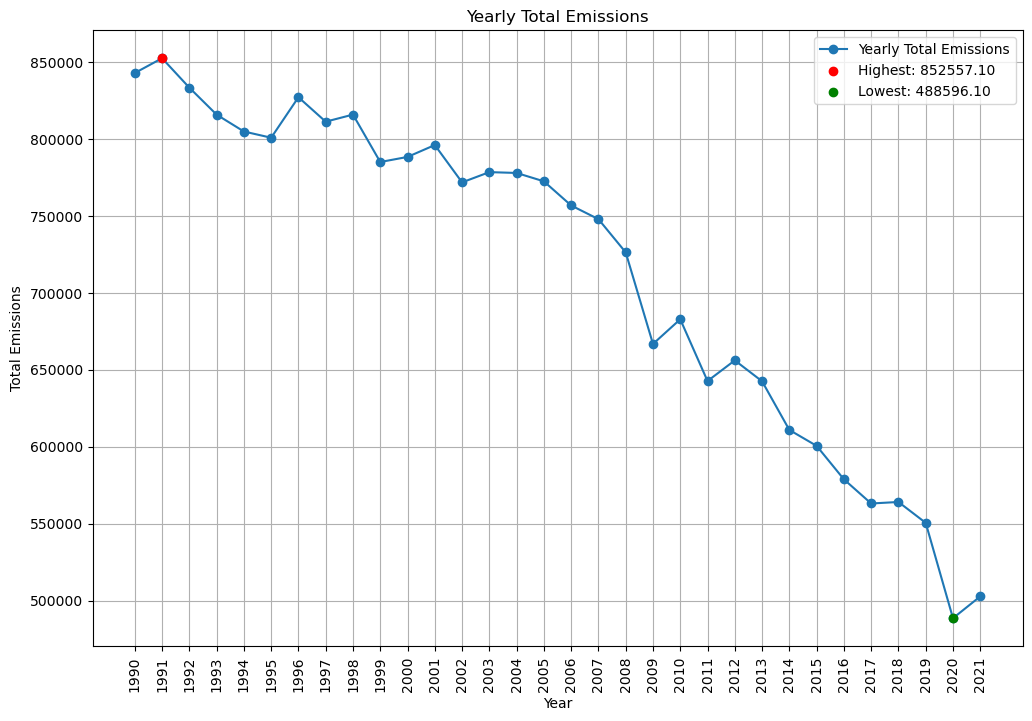

In [274]:
## PLOTTING for the existing data
total_row = df_GHG[df_GHG['Type'] == 'Total']

# Extract the year columns and corresponding values
years = year_columns
total_values = total_row[years].values.flatten()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(years, total_values, marker='o', label='Yearly Total Emissions')
plt.title('Yearly Total Emissions')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

# Identify highest and lowest values
max_value_year = total_values.argmax()
min_value_year = total_values.argmin()
max_value = total_values[max_value_year]
min_value = total_values[min_value_year]

# Plotting the highest and lowest points
plt.scatter(years[max_value_year], max_value, color='red', label=f'Highest: {max_value:.2f}', zorder=5)
plt.scatter(years[min_value_year], min_value, color='green', label=f'Lowest: {min_value:.2f}', zorder=5)

plt.legend()
plt.xticks(rotation='vertical')
plt.show()


In [275]:
df_GHG['1990'].describe().round(decimals=2)

count       132.00
mean      12771.89
std       75632.89
min           0.30
25%         265.30
50%         959.55
75%        2812.02
max      842944.60
Name: 1990, dtype: float64

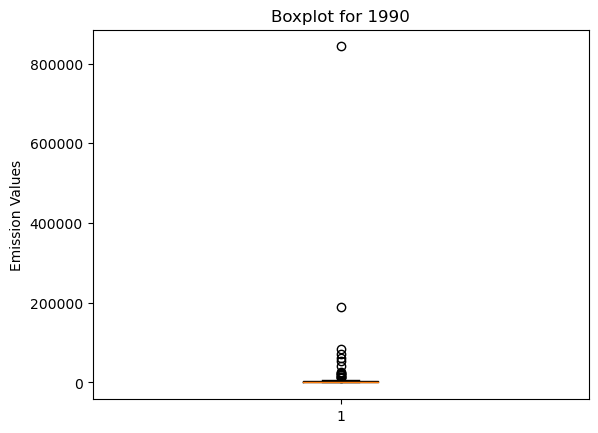

In [276]:
#boxplot for the '1990' column
plt.boxplot(df_GHG['1990'].dropna())  # Drop NA values for accurate plotting
plt.title('Boxplot for 1990')
plt.ylabel('Emission Values')
plt.show()

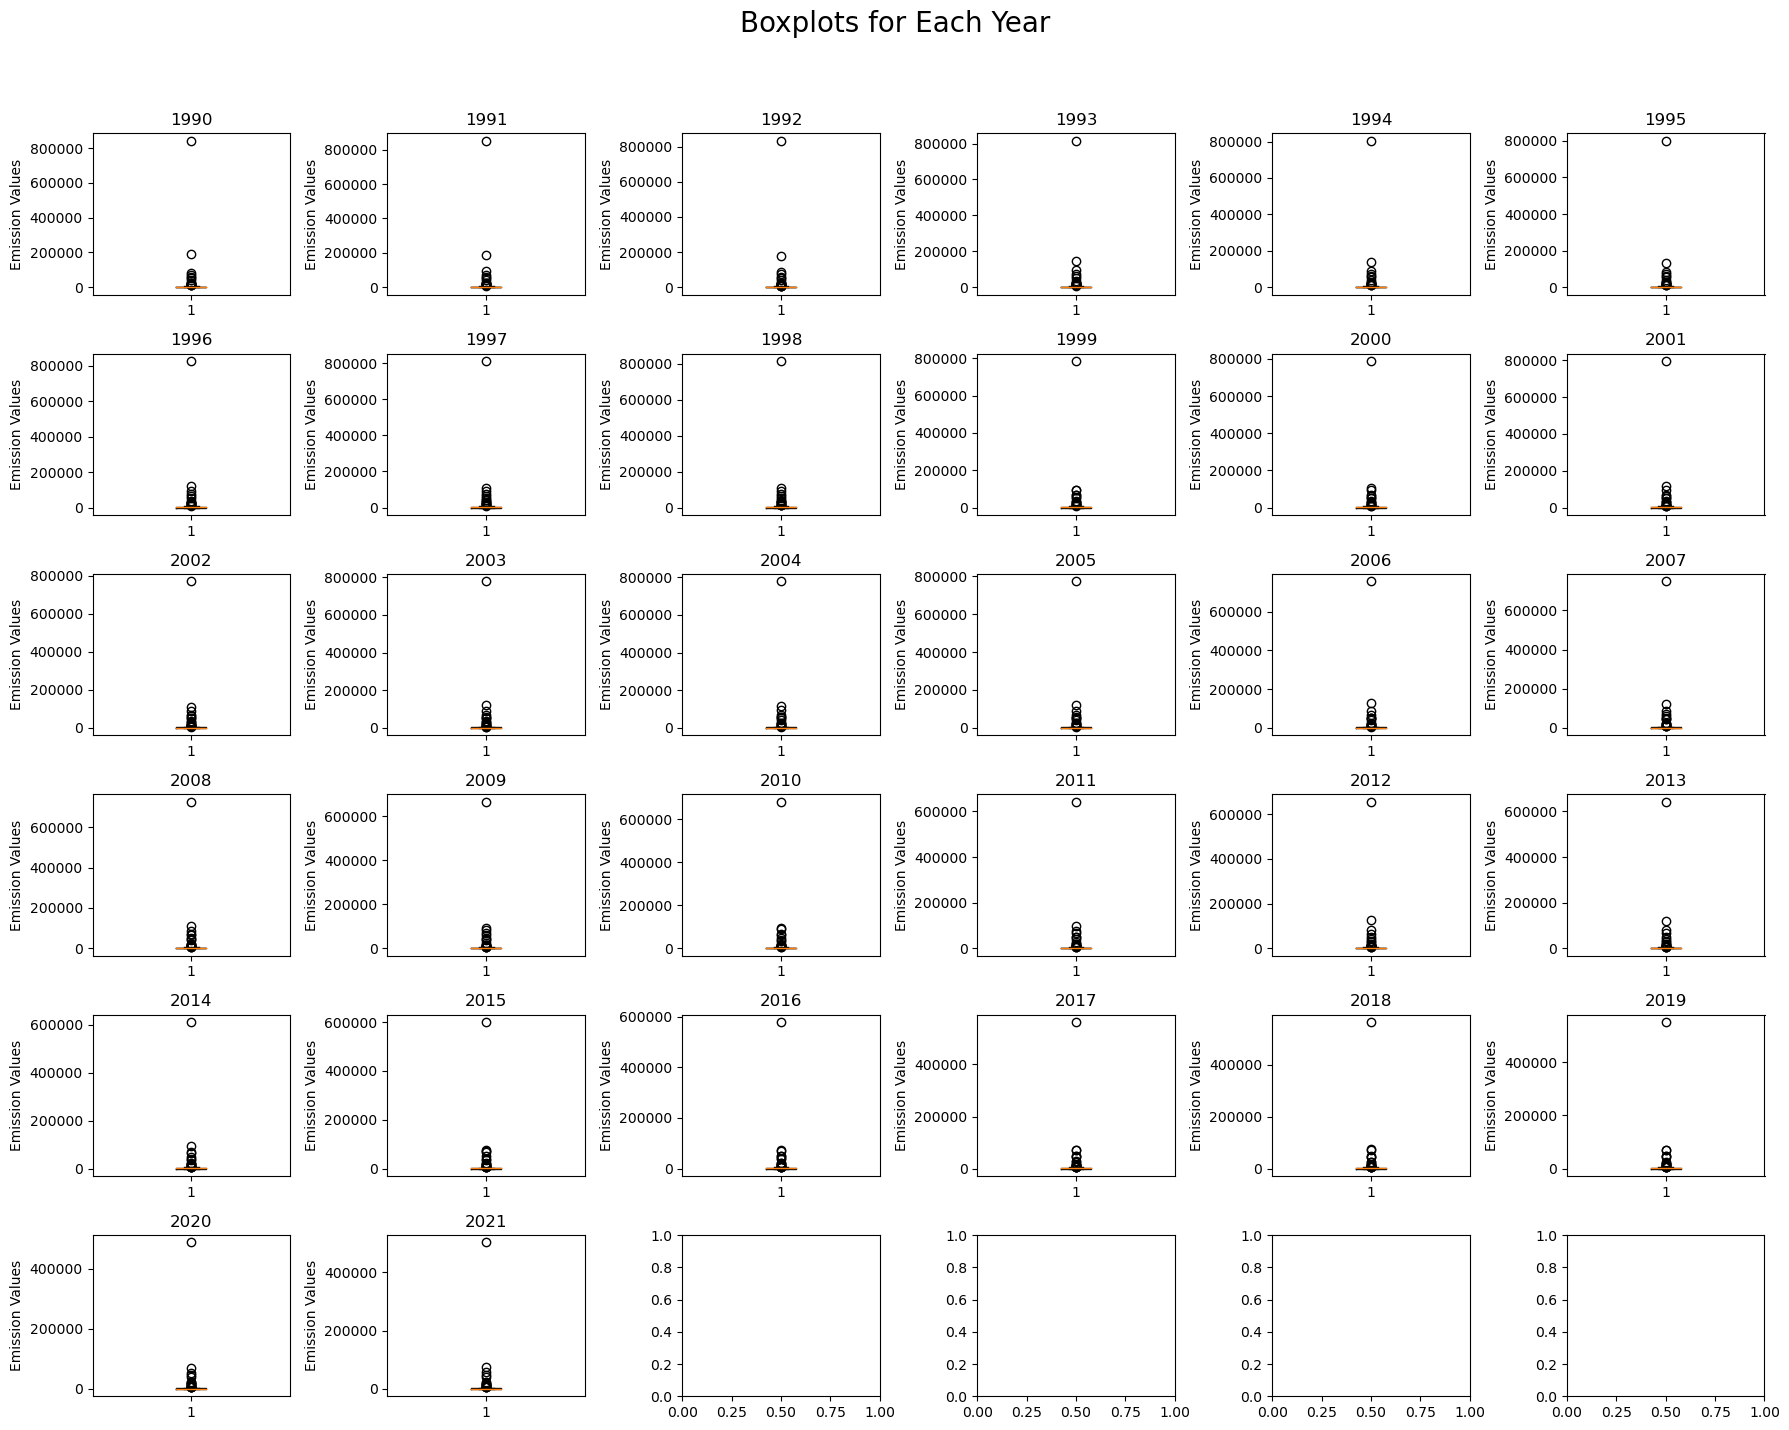

In [277]:
#subplots for each year
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(18, 15))
fig.suptitle('Boxplots for Each Year', fontsize=20)
axs = axs.flatten()

# Loop through each year
for i, year in enumerate(year_columns):
    axs[i].boxplot(df_GHG[year].dropna())
    axs[i].set_title(year)
    axs[i].set_ylabel('Emission Values')
    
#layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


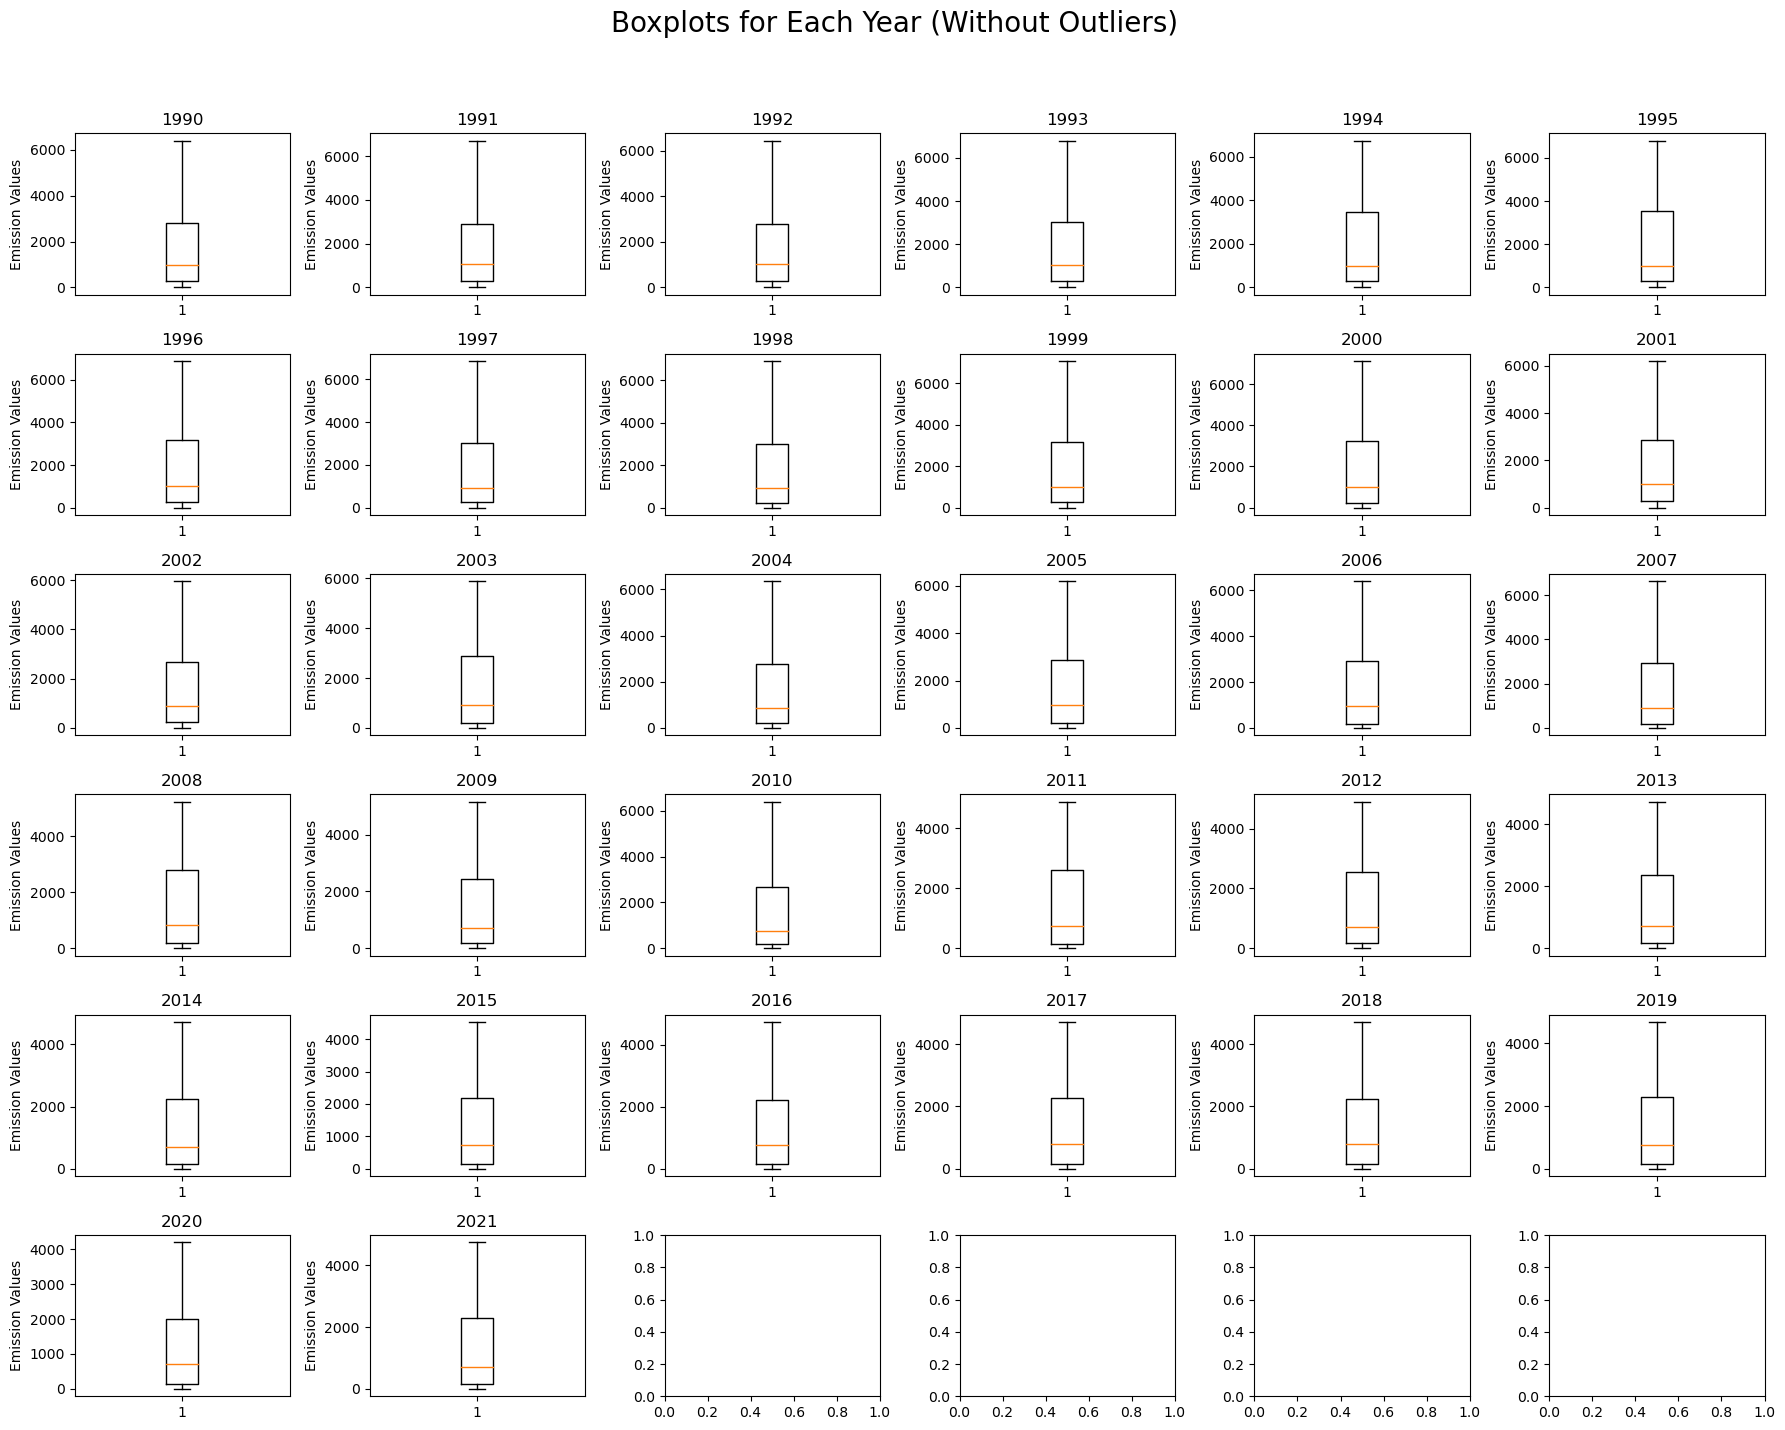

In [278]:
#####WITHOUT OUTLIERS
#subplots for each year
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(18, 15))
fig.suptitle('Boxplots for Each Year (Without Outliers)', fontsize=20)
axs = axs.flatten()

# Loop through each year and create a boxplot without outliers
for i, year in enumerate(year_columns):
    axs[i].boxplot(df_GHG[year].dropna(), showfliers=False)  # Set showfliers to False
    axs[i].set_title(year)
    axs[i].set_ylabel('Emission Values')

#layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


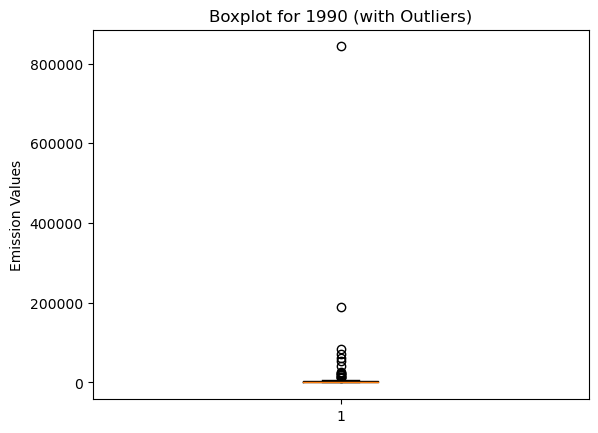

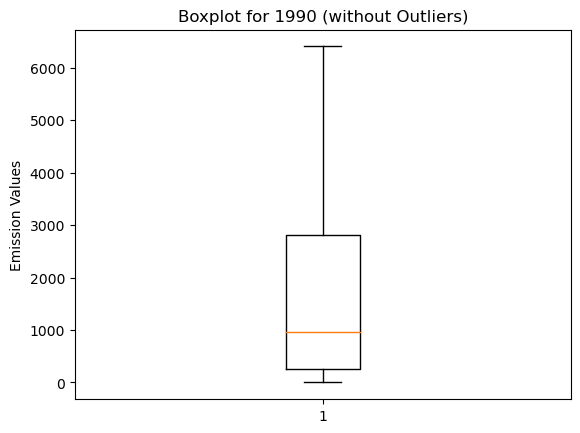

In [279]:
# Boxplot for '1990' column with outliers
plt.boxplot(df_GHG['1990'].dropna(), showfliers=True)
plt.title('Boxplot for 1990 (with Outliers)')
plt.ylabel('Emission Values')
plt.show()

# Boxplot for '1990' column without outliers
plt.boxplot(df_GHG['1990'].dropna(), showfliers=False)
plt.title('Boxplot for 1990 (without Outliers)')
plt.ylabel('Emission Values')
plt.show()


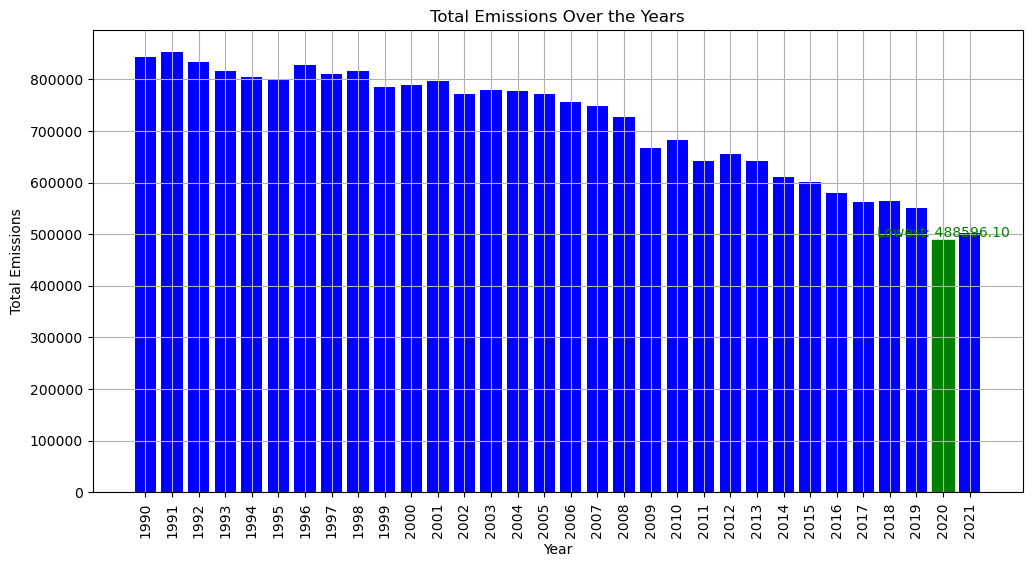

In [287]:
# total emissions for each year
total_emissions = df_GHG[year_columns].sum() / 2

# highest and lowest points
max_year = total_emissions.idxmax()
min_year = total_emissions.idxmin()
max_value = total_emissions.max()
min_value = total_emissions.min()

# bar plot for emissions over the years
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(total_emissions.index, total_emissions, color='b')

# Remove the line that sets the color for the highest point
# bar_plot[total_emissions.index.get_loc(max_year)].set_color('r')

# Mark the lowest point
bar_plot[total_emissions.index.get_loc(min_year)].set_color('g')

# Display years vertically
plt.xticks(rotation='vertical')

# Annotate the lowest point
plt.text(min_year, min_value, f'Lowest: {min_value:.2f}', ha='center', va='bottom', color='g')

plt.title('Total Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()


In [99]:
#### TIME SERIES FORECASTING

In [206]:
df_GHG.columns

Index(['SIC Group', 'Section', 'Type', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [256]:
#create a new df for only values and years for the models
total_data = df_GHG[df_GHG['Type'] == 'Total']

columns_to_select = ['Type'] + list(df_GHG.columns[3:])
forecast_df_total = total_data[columns_to_select]


forecast_df_total = forecast_df_total.melt(var_name='Year', value_name='Value')
print(forecast_df_total)


    Year     Value
0   Type     Total
1   1990  842944.6
2   1991  852557.1
3   1992  833416.9
4   1993  815888.8
5   1994  804929.2
6   1995  800882.1
7   1996  827194.2
8   1997  811315.2
9   1998  815920.5
10  1999  785099.3
11  2000  788407.0
12  2001  796129.3
13  2002  771864.6
14  2003  778528.3
15  2004  777988.7
16  2005  772538.8
17  2006  756850.6
18  2007  747966.3
19  2008  726375.0
20  2009  666850.7
21  2010  682897.2
22  2011  642747.3
23  2012  656182.8
24  2013  642592.0
25  2014  610966.8
26  2015  600621.9
27  2016  578877.3
28  2017  563160.3
29  2018  564144.7
30  2019  550583.6
31  2020  488596.1
32  2021  502786.3


In [235]:
# Drop the first row by index
forecast_df_total = forecast_df_total.drop(0)

# Reset the index
forecast_df_total = forecast_df_total.reset_index(drop=True)

In [236]:
forecast_df_total

,Year,Value
0,1990,842944.6
1,1991,852557.1
2,1992,833416.9
3,1993,815888.8
4,1994,804929.2
5,1995,800882.1
6,1996,827194.2
7,1997,811315.2
8,1998,815920.5
9,1999,785099.3


In [237]:
forecast_df_total.dtypes

Year     object
Value    object
dtype: object

In [239]:
# Assuming forecast_df_total is your DataFrame
forecast_df_total['Year'] = forecast_df_total['Year'].astype(int)
forecast_df_total['Value'] = forecast_df_total['Value'].astype(float)

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

#features (X) and target variable (y)
X = forecast_df_total[['Year']]
y = forecast_df_total['Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
# Model 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [242]:
# Model 2: Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Evaluate Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


In [243]:
# Print model performance
print("Linear Regression:")
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'R-squared (R2): {r2_lr:.2f}')

print("\nDecision Tree Regressor:")
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')
print(f'R-squared (R2): {r2_dt:.2f}')

Linear Regression:
Mean Squared Error (MSE): 1649926039.39
R-squared (R2): 0.89

Decision Tree Regressor:
Mean Squared Error (MSE): 218028621.17
R-squared (R2): 0.98


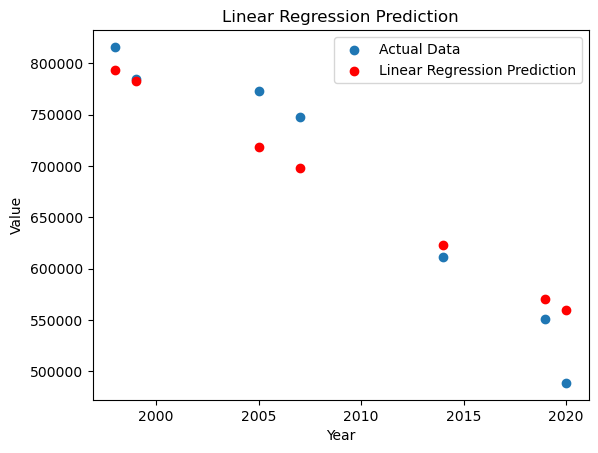

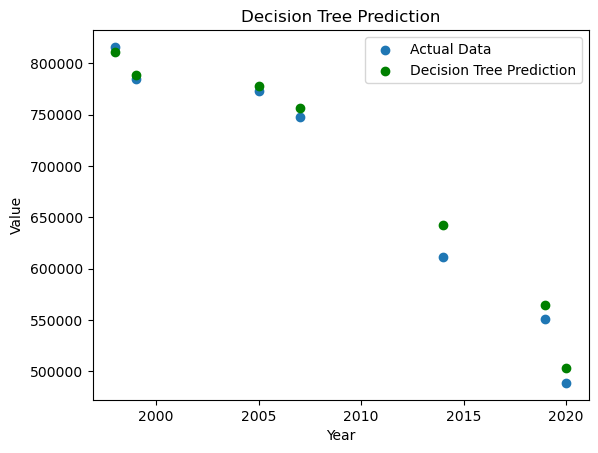

In [245]:
# Plotting the actual vs. predicted values for Linear Regression
plt.scatter(X_test['Year'].tolist(), y_test, label='Actual Data')
plt.scatter(X_test['Year'].tolist(), y_pred_lr, label='Linear Regression Prediction', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

# Plotting the actual vs. predicted values for Decision Tree Regressor
plt.scatter(X_test['Year'].tolist(), y_test, label='Actual Data')
plt.scatter(X_test['Year'].tolist(), y_pred_dt, label='Decision Tree Prediction', color='green')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Decision Tree Prediction')
plt.legend()
plt.show()


Linear Regression - Actual vs. Predicted:
    Year    Actual  Linear Regression Prediction
29  2019  550583.6                 570257.514950
15  2005  772538.8                 718777.512644
24  2014  610966.8                 623300.371269
17  2007  747966.3                 697560.370116
8   1998  815920.5                 793037.511491
9   1999  785099.3                 782428.940227
30  2020  488596.1                 559648.943686


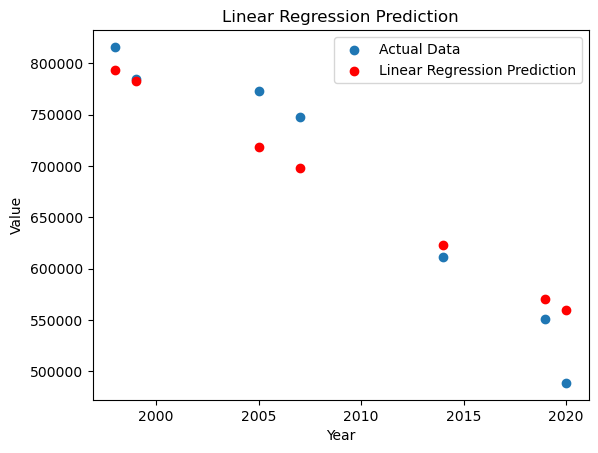

Decision Tree Regressor - Actual vs. Predicted:
    Year    Actual  Decision Tree Prediction
29  2019  550583.6                  564144.7
15  2005  772538.8                  777988.7
24  2014  610966.8                  642592.0
17  2007  747966.3                  756850.6
8   1998  815920.5                  811315.2
9   1999  785099.3                  788407.0
30  2020  488596.1                  502786.3


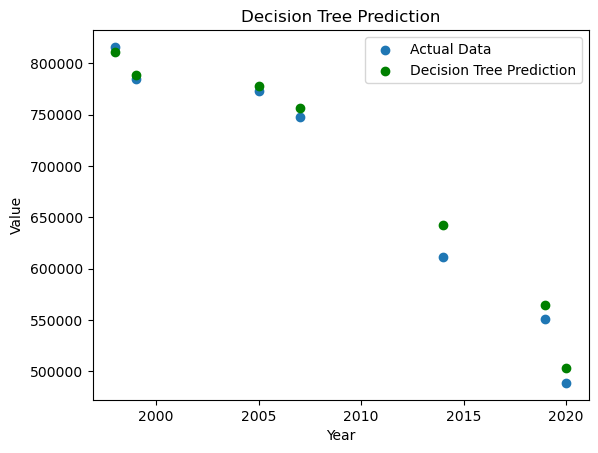

In [246]:
# Print actual vs. predicted values for Linear Regression
print("Linear Regression - Actual vs. Predicted:")
print(pd.DataFrame({'Year': X_test['Year'].tolist(), 'Actual': y_test, 'Linear Regression Prediction': y_pred_lr}))

# Plotting the actual vs. predicted values for Linear Regression
plt.scatter(X_test['Year'].tolist(), y_test, label='Actual Data')
plt.scatter(X_test['Year'].tolist(), y_pred_lr, label='Linear Regression Prediction', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

# Print actual vs. predicted values for Decision Tree Regressor
print("Decision Tree Regressor - Actual vs. Predicted:")
print(pd.DataFrame({'Year': X_test['Year'].tolist(), 'Actual': y_test, 'Decision Tree Prediction': y_pred_dt}))

# Plotting the actual vs. predicted values for Decision Tree Regressor
plt.scatter(X_test['Year'].tolist(), y_test, label='Actual Data')
plt.scatter(X_test['Year'].tolist(), y_pred_dt, label='Decision Tree Prediction', color='green')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Decision Tree Prediction')
plt.legend()
plt.show()


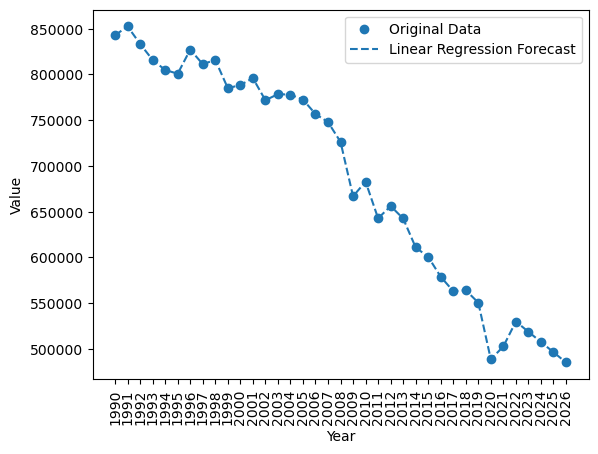

In [247]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#features (X) and target variable (y)
X = forecast_df_total[['Year']]
y = forecast_df_total['Value']

#linear regression model
model = LinearRegression()
model.fit(X, y)
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025, 2026]})
predictions = model.predict(future_years[['Year']])
forecast_df_extended = pd.concat([forecast_df_total, pd.DataFrame({'Year': future_years['Year'], 'Value': predictions})], ignore_index=True)

forecast_df_extended['Year'] = forecast_df_extended['Year'].astype(str)

# Plot
plt.scatter(forecast_df_extended['Year'], forecast_df_extended['Value'], label='Original Data')
plt.plot(forecast_df_extended['Year'], forecast_df_extended['Value'], label='Linear Regression Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


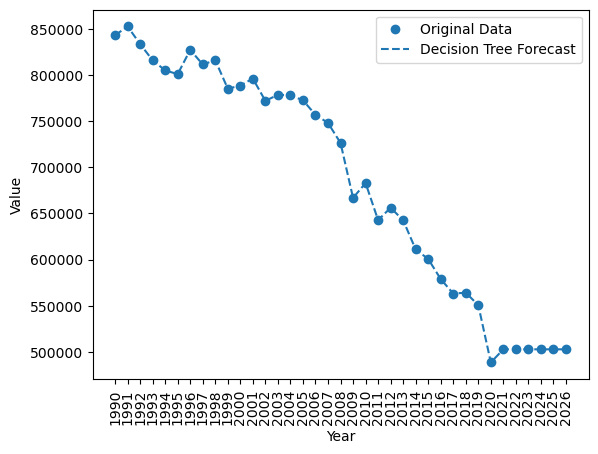

In [248]:
# Decision Tree Regressor model
model_dt = DecisionTreeRegressor()
model_dt.fit(X, y)
predictions_dt = model_dt.predict(future_years[['Year']])
forecast_df_extended_dt = pd.concat([forecast_df_total, pd.DataFrame({'Year': future_years['Year'], 'Value': predictions_dt})], ignore_index=True)

forecast_df_extended_dt['Year'] = forecast_df_extended_dt['Year'].astype(str)

# Plot
plt.scatter(forecast_df_extended_dt['Year'], forecast_df_extended_dt['Value'], label='Original Data')
plt.plot(forecast_df_extended_dt['Year'], forecast_df_extended_dt['Value'], label='Decision Tree Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [249]:
print("Linear Regression Forecasted Values:")
forecast_df_extended['Value'] = forecast_df_extended['Value'].round(2)
print(forecast_df_extended[['Year', 'Value']])

Linear Regression Forecasted Values:
    Year      Value
0   1990  842944.60
1   1991  852557.10
2   1992  833416.90
3   1993  815888.80
4   1994  804929.20
5   1995  800882.10
6   1996  827194.20
7   1997  811315.20
8   1998  815920.50
9   1999  785099.30
10  2000  788407.00
11  2001  796129.30
12  2002  771864.60
13  2003  778528.30
14  2004  777988.70
15  2005  772538.80
16  2006  756850.60
17  2007  747966.30
18  2008  726375.00
19  2009  666850.70
20  2010  682897.20
21  2011  642747.30
22  2012  656182.80
23  2013  642592.00
24  2014  610966.80
25  2015  600621.90
26  2016  578877.30
27  2017  563160.30
28  2018  564144.70
29  2019  550583.60
30  2020  488596.10
31  2021  502786.30
32  2022  529944.67
33  2023  518771.23
34  2024  507597.79
35  2025  496424.36
36  2026  485250.92


In [250]:
#forecasted values for Decision Tree Regressor
print("Decision Tree Forecasted Values:")
print(forecast_df_extended_dt[['Year', 'Value']])

Decision Tree Forecasted Values:
    Year     Value
0   1990  842944.6
1   1991  852557.1
2   1992  833416.9
3   1993  815888.8
4   1994  804929.2
5   1995  800882.1
6   1996  827194.2
7   1997  811315.2
8   1998  815920.5
9   1999  785099.3
10  2000  788407.0
11  2001  796129.3
12  2002  771864.6
13  2003  778528.3
14  2004  777988.7
15  2005  772538.8
16  2006  756850.6
17  2007  747966.3
18  2008  726375.0
19  2009  666850.7
20  2010  682897.2
21  2011  642747.3
22  2012  656182.8
23  2013  642592.0
24  2014  610966.8
25  2015  600621.9
26  2016  578877.3
27  2017  563160.3
28  2018  564144.7
29  2019  550583.6
30  2020  488596.1
31  2021  502786.3
32  2022  502786.3
33  2023  502786.3
34  2024  502786.3
35  2025  502786.3
36  2026  502786.3


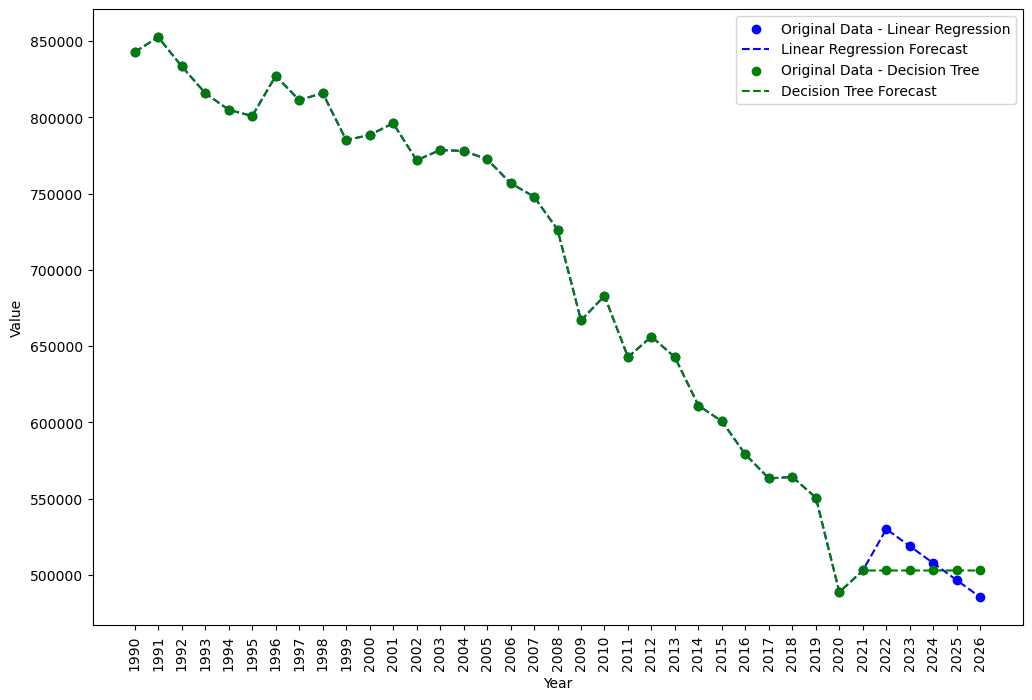

In [251]:
# Features (X) and target variable (y)
X = forecast_df_total[['Year']]
y = forecast_df_total['Value']

# Linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)
predictions_lr = model_lr.predict(future_years[['Year']])
forecast_df_extended_lr = pd.concat([forecast_df_total, pd.DataFrame({'Year': future_years['Year'], 'Value': predictions_lr})], ignore_index=True)
forecast_df_extended_lr['Year'] = forecast_df_extended_lr['Year'].astype(str)

# Decision Tree Regressor model
model_dt = DecisionTreeRegressor()
model_dt.fit(X, y)
predictions_dt = model_dt.predict(future_years[['Year']])
forecast_df_extended_dt = pd.concat([forecast_df_total, pd.DataFrame({'Year': future_years['Year'], 'Value': predictions_dt})], ignore_index=True)
forecast_df_extended_dt['Year'] = forecast_df_extended_dt['Year'].astype(str)

# Plot
plt.figure(figsize=(12, 8))

# Linear Regression Plot
plt.scatter(forecast_df_extended_lr['Year'], forecast_df_extended_lr['Value'], label='Original Data - Linear Regression', color='blue')
plt.plot(forecast_df_extended_lr['Year'], forecast_df_extended_lr['Value'], label='Linear Regression Forecast', linestyle='--', color='blue')

# Decision Tree Regressor Plot
plt.scatter(forecast_df_extended_dt['Year'], forecast_df_extended_dt['Value'], label='Original Data - Decision Tree', color='green')
plt.plot(forecast_df_extended_dt['Year'], forecast_df_extended_dt['Value'], label='Decision Tree Forecast', linestyle='--', color='green')

plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()
